# Plotting observations
Create scatter and hexbin plots based on the observation coordinates.

Input: a list of netCDF files storing the observations as ragged arrays.

In [3]:
using Pkg
Pkg.activate("./")
using Glob
using DIVAnd
using NCDatasets
using GeoDatasets
using CairoMakie, GeoMakie
using JupyterFormatter
enable_autoformat()
include("./config.jl")

  Activating project at `~/Projects/EMODnet/EMODnet-Chemistry-GriddedMaps/src`


plot_field_var_fast (generic function with 4 methods)

## Files and directories
Defined in the file `config.jl`

## Loop on the variables

In [13]:
findall(isnan.(obslat))

Int64[]

In [20]:
for varname in varlist[3:end]

    @info("Working on variable $(varname)")

    # Generate list of files (corresponding to this variable)
    datafilelist = sort(Glob.glob("*$(varname)*.nc", datadir))

    # Get the coordinates of the profiles
    obslon, obslat = get_unique_coordinates(datafilelist, varname)

    # Generate figures

    # fig0 = make_scatter(datafilelist, varname)
    # save(joinpath(figdir, "observations_$(varname)2.png"), fig0, px_per_unit = 300 / inch)

    # Hexbin plot
    fighex = make_hexbin(obslon, obslat, varname)
    save(
        joinpath(figdir, "observations_$(varname)_hex.png"),
        fighex,
        px_per_unit = 300 / inch,
    )
end

[ Info: Working on variable Water_body_dissolved_inorganic_nitrogen
[ Info: Working on variable Water_body_silicate
[ Info: Working on variable Water_body_phosphate
[ Info: Working on variable Water_body_dissolved_oxygen_concentration


## Time series
We represent all the time series, whatever the variable.

[ Info: Found 4 files


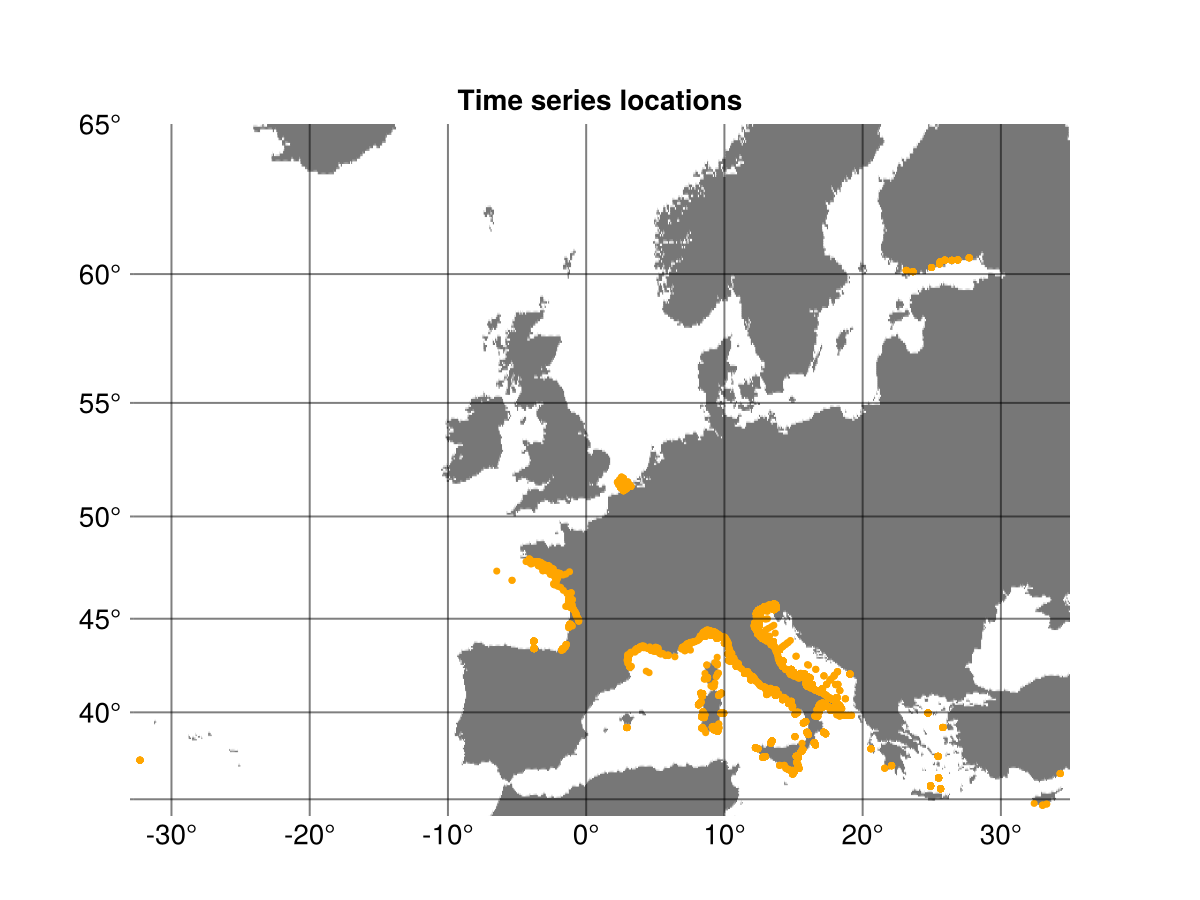

In [88]:
datadirTS = joinpath(datadir, "../ODVnetCDF")
datafilelistTS = Glob.glob("*timeseries*.nc", datadirTS)
@info("Found $(length(datafilelistTS)) files")

fig = Figure()
ga = GeoAxis(
    fig[1, 1],
    title = "Time series locations",
    dest = "+proj=merc",
    xticks = -40.0:10.0:40.0,
    yticks = 30.0:5.0:65,
    #dest = "+proj=ortho +lon_0=15 +lat_0=35",
)
heatmap!(
    ga,
    lon_landsea,
    lat_landsea,
    landsea,
    colormap = Reverse(:greys),
    colorrange = [0, 2],
)
#xlims!(-180, 180.0)
#ylims!(-90.0, 90.0)

obslon = Float64[]
obslat = Float64[]
for datafile in datafilelistTS
    NCDataset(datafile, "r") do nc
        append!(obslon, varbyattrib(nc, standard_name = "longitude")[1][:])
        append!(obslat, varbyattrib(nc, standard_name = "latitude")[1][:])

    end
end
plot!(ga, obslon, obslat, color = :orange, markersize = 5)
xlims!(ga, -33, 35)
ylims!(ga, 34.0, 65.0)
save(joinpath(figdir, "observations_timeseries.png"), fig, px_per_unit = 300 / inch)
fig